# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 23.04.2024

Мягкий дедлайн: 13.05.2024 23:59 MSK

Жесткий дедлайн: 18.05.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Задание -1 (1 балл)**. EDA

*Offtop: в данном задании для EDA была использована помощь chatgpt*

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [2]:
# """%%bash
# kaggle datasets download -d mlg-ulb/creditcardfraud
# unzip creditcardfraud.zip""";

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [5]:
share = sum(df["Class"]) / df.shape[0]
print(f"Доля положительных объектов: {share}")

Доля положительных объектов: 0.001727485630620034


Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [6]:
df["hours"] = df["Time"].apply(lambda x: x // 3600 % 24)
df["days"] = df["Time"].apply(lambda x: x // 86400)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hours,days
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0,1.0


Так как самые последние данные по времени содержат 1 день и 24 часа (значение в колонке часов 23, но по счету это 24 значение), то данные покрывают 2 дня.

Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

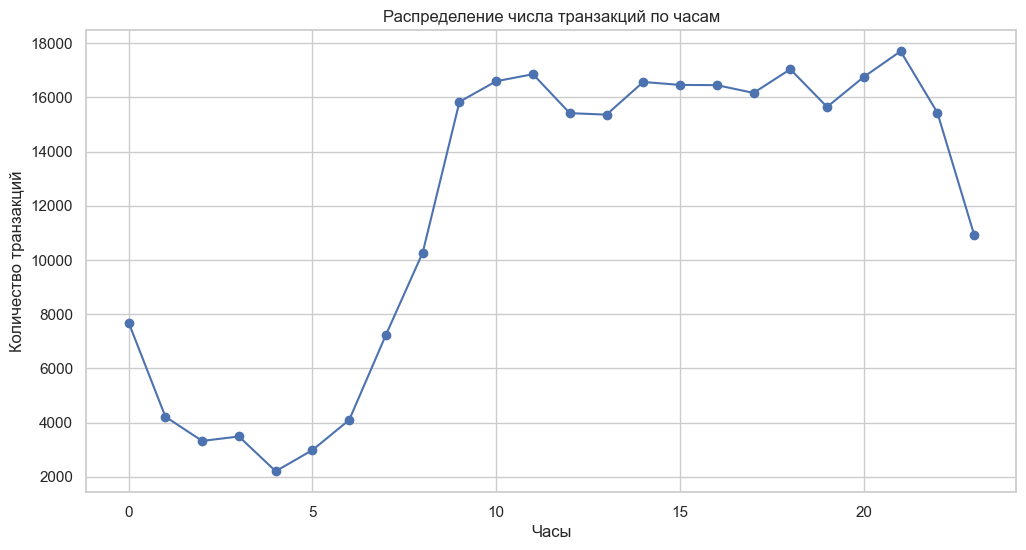

In [7]:
transactions_per_hour = df['hours'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(transactions_per_hour.index, transactions_per_hour.values, marker='o')
plt.title('Распределение числа транзакций по часам')
plt.xlabel('Часы')
plt.ylabel('Количество транзакций')
plt.grid(True)
plt.show()

По данному графику видим, что число транзакций начинает возрастать ближе к обеду и примерно сохраняет одинаковый темп в течение буднего времени, примерно до 22. В период с 22 до 9 часов происходит меньшее число, так как люди спят)

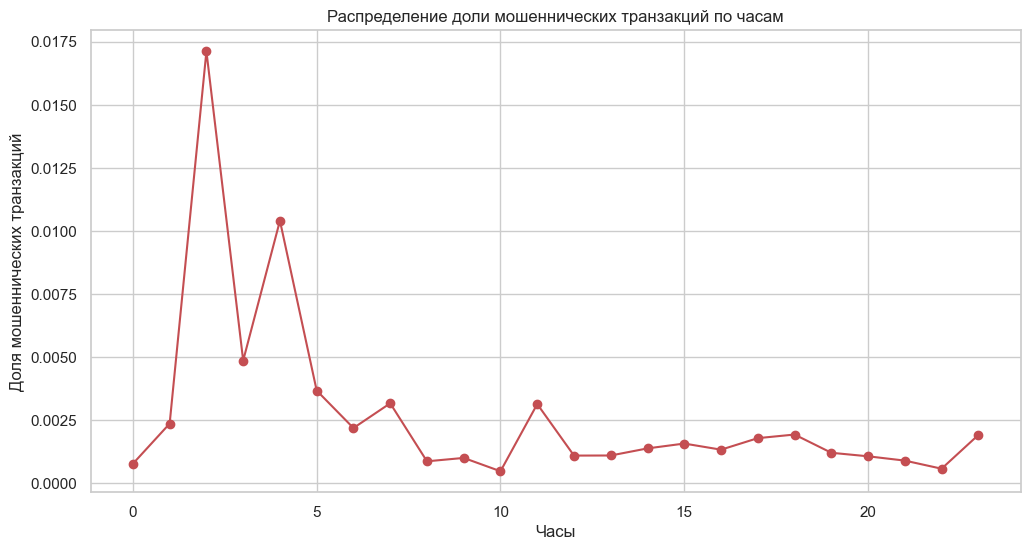

In [8]:
fraud_transactions_per_hour = df[df['Class'] == 1]['hours'].value_counts().sort_index()
total_transactions_per_hour = df['hours'].value_counts().sort_index()
fraud_ratio_per_hour = fraud_transactions_per_hour / total_transactions_per_hour

plt.figure(figsize=(12, 6))
plt.plot(fraud_ratio_per_hour.index, fraud_ratio_per_hour.values, marker='o', color='r')
plt.title('Распределение доли мошеннических транзакций по часам')
plt.xlabel('Часы')
plt.ylabel('Доля мошеннических транзакций')
plt.grid(True)
plt.show()

Видим, что самая большая долья мошеннических транзакций выпадает на ночное время: примерно с 1 до 5 утра.

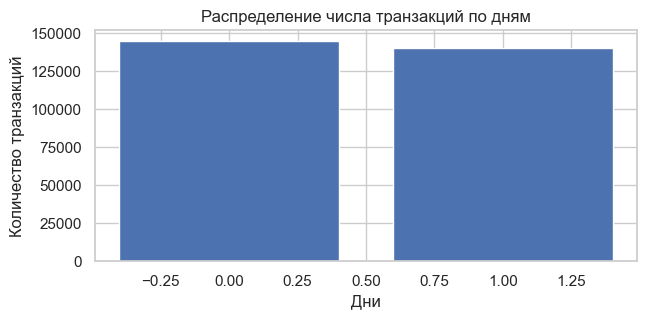

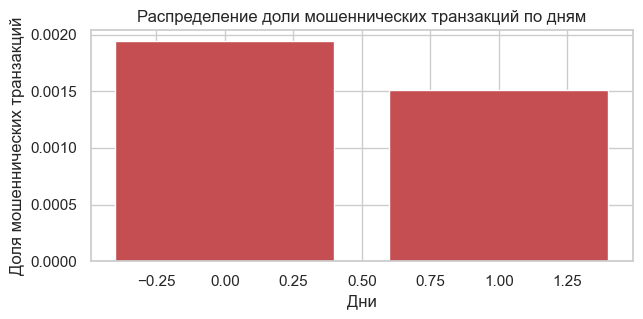

In [9]:
# Распределение числа транзакций по дням
transactions_per_day = df["days"].value_counts().sort_index()

plt.figure(figsize=(7, 3))
plt.bar(transactions_per_day.index, transactions_per_day.values)
plt.title('Распределение числа транзакций по дням')
plt.xlabel('Дни')
plt.ylabel('Количество транзакций')
plt.show()

# Доля мошеннических транзакций по дням
fraud_transactions_per_day = df[df["Class"] == 1]["days"].value_counts().sort_index()
total_transactions_per_day = df["days"].value_counts().sort_index()
fraud_ratio_per_day = fraud_transactions_per_day / total_transactions_per_day

plt.figure(figsize=(7, 3))
plt.bar(fraud_ratio_per_day.index, fraud_ratio_per_day.values, color='r')
plt.title('Распределение доли мошеннических транзакций по дням')
plt.xlabel('Дни')
plt.ylabel('Доля мошеннических транзакций')
plt.show()


Если количество транзакций в каждый из двух дней близки друг к другу, то больше мошеннических инцедентов происходило в первый день, нежели во второй.

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [10]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['Class'].drop('Class')

top_features = target_corr.abs().sort_values(ascending=False).head(5).index
print("Наиболее важные признаки:", top_features)


Наиболее важные признаки: Index(['V17', 'V14', 'V12', 'V10', 'V16'], dtype='object')


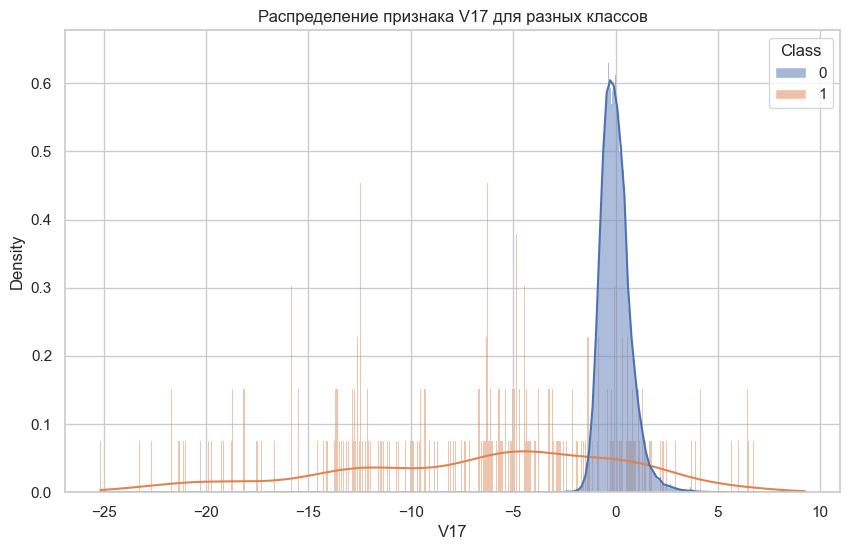

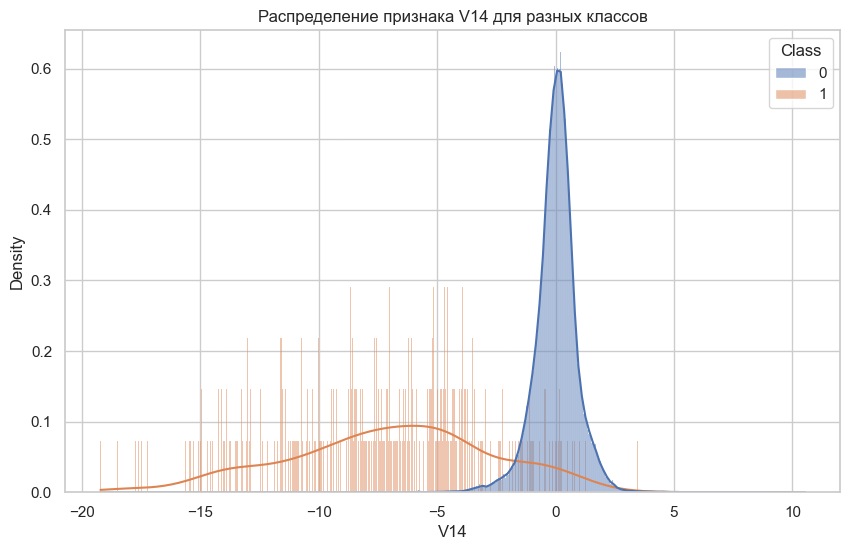

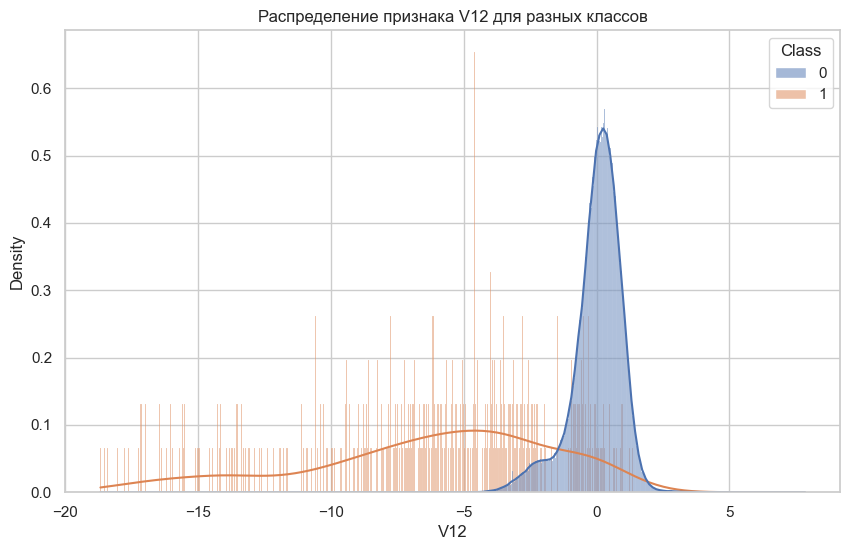

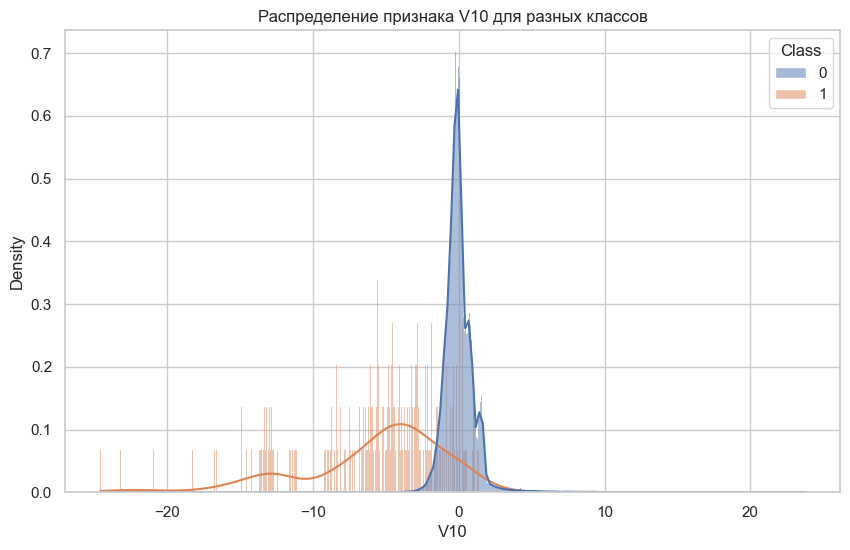

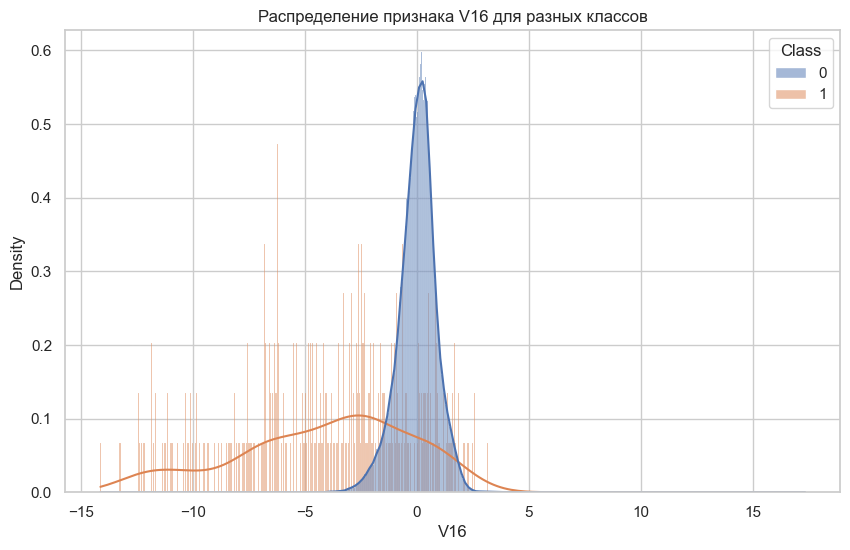

In [11]:
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat="density", common_norm=False)
    plt.title(f'Распределение признака {feature} для разных классов')
    plt.show()


Можно заметить, что для всех этих признаков "мошеннические" объекты имеют отрицательные значения. Наиболее лучшее разделение мошеннических/немошеннических транзакций имеют признаки **V14** и **V10**.

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим. 

In [12]:
# Определение индексов для разделения данных
n_total = len(df)
n_20_percent = int(n_total * 0.2)
n_10_percent = int(n_total * 0.1)

# Последние 20% данных
validation_and_test_data = df.iloc[-n_20_percent:]

# Разделение на валидационные и тестовые данные
validation_data = validation_and_test_data.iloc[:n_10_percent]
test_data = validation_and_test_data.iloc[n_10_percent:]

# Остальные 80% данных для тренировки
train_data = df.iloc[:-n_20_percent]

# Проверка размеров выборок
(train_data.shape, validation_data.shape, test_data.shape)


((227846, 33), (28480, 33), (28481, 33))

In [13]:
X_train = train_data.drop("Class", axis=1)
y_train = train_data["Class"]

X_val = validation_data.drop("Class", axis=1)
y_val = validation_data["Class"]

X_test = test_data.drop("Class", axis=1)
y_test = test_data["Class"]

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога. 

In [14]:
from sklearn.metrics import auc, precision_recall_curve

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [15]:
from sklearn.metrics import cohen_kappa_score

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$ 

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом. 

In [16]:
from sklearn.metrics import matthews_corrcoef

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [17]:
y = df["Class"]
y_pred = [df["Class"].mode()[0]] * df.shape[0]

In [18]:
precision, recall, _ = precision_recall_curve(y, y_pred)
print(f"AUC-PR: {auc(recall, precision)}")

AUC-PR: 0.50086374281531


In [19]:
print(f"Kappa score: {cohen_kappa_score(y, y_pred)}")

Kappa score: 0.0


In [20]:
print(f"Matthews score: {matthews_corrcoef(y, y_pred)}")

Matthews score: 0.0


Видим, что все метрики выдают нам согласованность на уровне рандома.

Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`). 

In [21]:
from catboost import CatBoostClassifier

In [22]:
cat_class = CatBoostClassifier(verbose=False)
cat_class.fit(X_train, y_train, eval_set=(X_val, y_val))
y_pred = cat_class.predict(X_test)

In [23]:
def calc_metrics(y, y_pred):
    precision, recall, _ = precision_recall_curve(y, y_pred)
    print(f"AUC-PR: {auc(recall, precision)}")
    print(f"Kappa score: {cohen_kappa_score(y, y_pred)}")
    print(f"Matthews score: {matthews_corrcoef(y, y_pred)}")

In [24]:
calc_metrics(y_test, y_pred)

AUC-PR: 0.7558222626886824
Kappa score: 0.7366708149419272
Matthews score: 0.7460414610269303


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [25]:
minor_weight = len(df[df["Class"] == 0]) / len(df[df["Class"] == 1])

catboost = CatBoostClassifier(class_weights=[1, minor_weight], verbose=False)
catboost.fit(X_train, y_train, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)

In [26]:
calc_metrics(y_test, y_pred)

AUC-PR: 0.40835863067527184
Kappa score: 0.0815841116117152
Matthews score: 0.18207201679599505


Видим, что качество модели значительно упало, будем дальше это фиксить с помощью весов.

Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части. 

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

In [27]:
class_weights_list = [[1, minor_weight * 0.7], [1, minor_weight * 0.8], [1, minor_weight * 0.9], [1, minor_weight], 
                      [1, minor_weight * 1.1], [1, minor_weight * 1.2], [1, minor_weight * 1.3], [1, minor_weight * 1.4]]

In [28]:
aucs = []
for weights in class_weights_list:
    catboost = CatBoostClassifier(class_weights=weights, verbose=False)
    catboost.fit(X_train, y_train, eval_set=(X_val, y_val))
    y_pred = catboost.predict(X_val)
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    aucs.append(auc(recall, precision))
    
best_weights = class_weights_list[np.argmax(aucs)]
print(f"Best weights is {best_weights} with index {np.argmax(aucs) + 1}")

Best weights is [1, 520.0884146341464] with index 3


Видим, что наилучшая метрика у модели с третьими весами - [1, minor_weight * 0.9], будем использовать их

In [29]:
catboost = CatBoostClassifier(class_weights=best_weights, verbose=False)
catboost.fit(X_train, y_train, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.42086436964601354
Kappa score: 0.12515304513248182
Matthews score: 0.22911134606246855


Посмотрим на пороги бинаризации:

In [30]:
print("Original classification threshold:")
print(catboost.get_probability_threshold())

Original classification threshold:
0.5


Будем подбирать порог под Kappa score:

In [31]:
threshold_list = np.linspace(0, 1, 15)
kappas = []
for threshold in threshold_list:
    catboost.set_probability_threshold(threshold)
    y_pred = catboost.predict(X_val)
    kappas.append(cohen_kappa_score(y_val, y_pred))
    
best_threshold = threshold_list[np.argmax(kappas)]
print(f"Best threshold is {best_threshold} with index {np.argmax(kappas) + 1}")

Best threshold is 0.9285714285714285 with index 14


В результате получаем, что наилучшие веса - [1, 520.0884146341464], наилучший порог бинаризации - 0.9285714285714285

In [32]:
catboost.set_probability_threshold(best_threshold)
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.6683222626886824
Kappa score: 0.666421265566935
Matthews score: 0.6671792493946082


Качество модели значительно улучшилось благодаря использованию данных техник, то есть мы достаточно хорошо подобрали и веса, и порог.

**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса. 

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [33]:
# !pip3 install imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку. 

In [34]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

Сначала обучим простую модель без подбора sampling_strategy

In [35]:
sm_model = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm_model.fit_resample(X_train, y_train)

In [36]:
y_train.value_counts(), y_train_sm.value_counts()

(0    227429
 1       417
 Name: Class, dtype: int64,
 0    227429
 1    227429
 Name: Class, dtype: int64)

Видим, что в таком случае количество объектов по классам полностью выравниваются.

Посмотрим метрики на полном выравнивании выборки:

In [37]:
catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_sm, y_train_sm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.7273780606528755
Kappa score: 0.7270618976581942
Matthews score: 0.7270618976581941


Теперь подберем параметр resampling, не доходя до полного выравнивания классов, чтобы улучшить качество модели

In [38]:
sample_list = np.linspace(0.1, 0.9, 9)
aucs = []

for sample in sample_list:
    sm_model = SMOTE(random_state=42, sampling_strategy=sample)
    X_train_sm, y_train_sm = sm_model.fit_resample(X_train, y_train)  
    
    catboost = CatBoostClassifier(verbose=False)
    catboost.fit(X_train_sm, y_train_sm, eval_set=(X_val, y_val))
    y_pred = catboost.predict(X_val)
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    aucs.append(auc(recall, precision))
    
best_sample = sample_list[np.argmax(aucs)]
print(f"Best sample is {best_sample} with index {np.argmax(aucs) + 1}")

Best sample is 0.5 with index 5


Наилучшим гиперпараметром стало sample_strategy=0.5, обучим на ней итоговую модель c частичным выравниванием и посмотрим метрики на тесте

In [39]:
sm_model = SMOTE(random_state=42, sampling_strategy=best_sample)
X_train_sm, y_train_sm = sm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_sm, y_train_sm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.7115677839730336
Kappa score: 0.7108828212298137
Matthews score: 0.7110586906187203


В результате получаем, что в нашем случае полное выравнивание классов дает лучшие метрики, чем частичное, разница составляет примерно 0.01.

**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

[BorderlineSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html) - модель для работы с несбалансированной выборкой. Генерирует новые объекты миноритарного класса из объектов, которые находятся на границе двух классов, используя k-NN. Таким образом модель учится различать более сложные пограничные случаи.

[SVM-SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html) - модель для работы с несбалансированной выборкой. Схожа с предыдщуей моделью BorderlineSMOTE тем, что тоже работает с пограничными объектами. С помощью k-NN генерирует объекты миноритарного класса из образцов, которые находятся близко к гиперплоскости, которая разделяет классы с помощью алгоритма SVM.

[K-Means-SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html) - модель для работы с несбалансированной выборкой. Сначала модель с помощью алгоритма KMeans разделяет все данные на несколько кластеров. Далее в каждом классе оценивается доля миноритарного класса: если она мала, то для данного кластера с помощью k-NN создаются новые образцы миноритарного класса. Эти объекты добавляются в текущий кластер, и таким образом размер данных увеличивается.

[ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html) - модель для работы с несбалансированной выборкой. Модель вычисляет плотность распределения миноритарного класса. Образцы, которые имеют меньше ближайших соседей из своего же класса (и, соответственно, больше соседей из мажоритарного класса), считаются более сложными для классификации. В отличие от обычного SMOTE, где все синтетические образцы создаются равномерно, ADASYN создает больше новых образцов для более сложных случаев. Это помогает модели лучше обучаться на трудных для классификации примерах. Модель также использует k-NN для генерации новых объектов.

Теперь попробуйте сравнить качество всех методов на наших данных.

In [40]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN

Гиперпараметры будем использовать, которые получили для обычного **SMOTE**

In [41]:
#Borderline
bsm_model = BorderlineSMOTE(random_state=42, sampling_strategy=best_sample)
X_train_bsm, y_train_bsm = bsm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_bsm, y_train_bsm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
print("BorderlineSMOTE:")
calc_metrics(y_test, y_pred)
print("\n")

#SVM
svmsm_model = SVMSMOTE(random_state=42, sampling_strategy=best_sample)
X_train_svmsm, y_train_svmsm = svmsm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_svmsm, y_train_svmsm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
print("SVMSMOTE:")
calc_metrics(y_test, y_pred)
print("\n")

#KMeans
ksm_model = KMeansSMOTE(random_state=42, sampling_strategy=best_sample, cluster_balance_threshold=0.001)
X_train_ksm, y_train_ksm = ksm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_ksm, y_train_ksm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
print("KMeansSMOTE:")
calc_metrics(y_test, y_pred)
print("\n")

#ADASYN
adasyn_model = ADASYN(random_state=42, sampling_strategy=best_sample)
X_train_adasyn, y_train_adasyn = adasyn_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_adasyn, y_train_adasyn, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
print("ADASYN:")
calc_metrics(y_test, y_pred)

BorderlineSMOTE:
AUC-PR: 0.7273780606528755
Kappa score: 0.7270618976581942
Matthews score: 0.7270618976581941


SVMSMOTE:
AUC-PR: 0.6837416970165119
Kappa score: 0.6805885875737472
Matthews score: 0.6819815751994611


KMeansSMOTE:
AUC-PR: 0.7847943285954593
Kappa score: 0.7803305381421477
Matthews score: 0.7824309099074692


ADASYN:
AUC-PR: 0.7115677839730336
Kappa score: 0.7108828212298137
Matthews score: 0.7110586906187203


Наилучшие метрики дает KMeansSMOTE, причем достаточно с большим приростом!

**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
sample_list = np.linspace(0.01, 0.5, 10)
aucs = []
kappas = []
matthews = []

for sample in sample_list:
    rm_model = RandomUnderSampler(random_state=42, sampling_strategy=sample)
    X_train_rm, y_train_rm = rm_model.fit_resample(X_train, y_train)  
    
    catboost = CatBoostClassifier(verbose=False)
    catboost.fit(X_train_rm, y_train_rm, eval_set=(X_val, y_val))
    y_pred = catboost.predict(X_val)
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    aucs.append(auc(recall, precision))
    kappas.append(cohen_kappa_score(y_val, y_pred))
    matthews.append(matthews_corrcoef(y_val, y_pred))
    
best_sample = sample_list[np.argmax(aucs)]
print(f"Best sample is {best_sample} with index {np.argmax(aucs) + 1}")

Best sample is 0.01 with index 1


In [44]:
rm_model = RandomUnderSampler(random_state=42, sampling_strategy=best_sample)
X_train_rm, y_train_rm = rm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_rm, y_train_rm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.7160319798525971
Kappa score: 0.7140753704859444
Matthews score: 0.71488755582656


Видим, что метрики остались примерно такими же, как и у SMOTE: то есть в данном случае увеличение минорного класса и уменьшение мажорного дали одинаковый прирост качества модели.

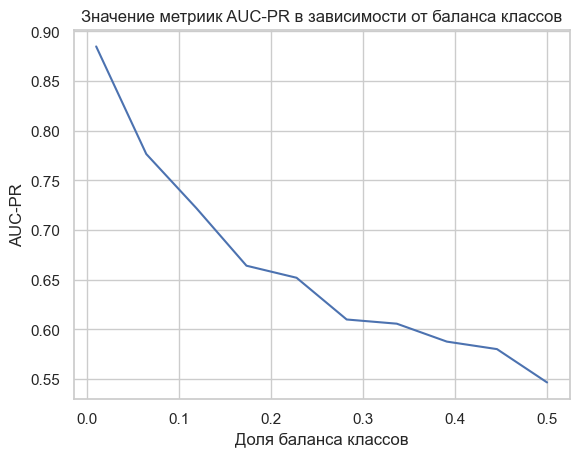

In [45]:
plt.plot(sample_list, aucs)
plt.title("Значение метриик AUC-PR в зависимости от баланса классов")
plt.xlabel("Доля баланса классов")
plt.ylabel("AUC-PR")
plt.show()

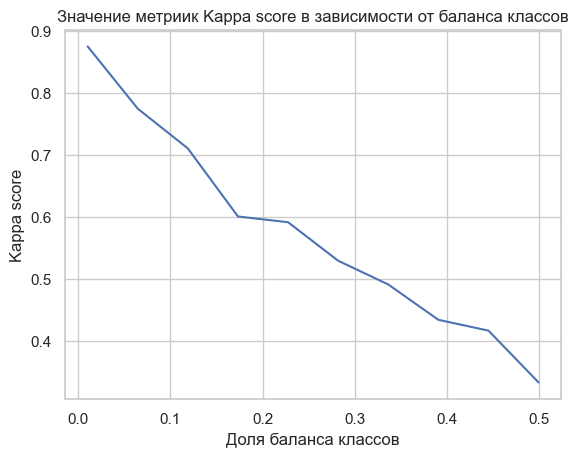

In [46]:
plt.plot(sample_list, kappas)
plt.title("Значение метриик Kappa score в зависимости от баланса классов")
plt.xlabel("Доля баланса классов")
plt.ylabel("Kappa score")
plt.show()

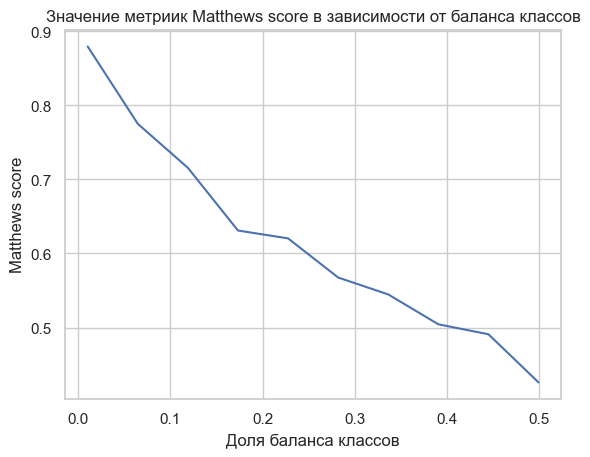

In [47]:
plt.plot(sample_list, matthews)
plt.title("Значение метриик Matthews score в зависимости от баланса классов")
plt.xlabel("Доля баланса классов")
plt.ylabel("Matthews score")
plt.show()

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [48]:
from imblearn.under_sampling import NearMiss

k_neighbors = [1, 2, 3, 4, 5]
aucs = np.empty((len(sample_list), len(k_neighbors)))
kappas = np.empty((len(sample_list), len(k_neighbors)))
matthews = np.empty((len(sample_list), len(k_neighbors)))

for i, sample in enumerate(sample_list):
    for j, neighbor in enumerate(k_neighbors):
        nm_model = NearMiss(sampling_strategy=sample, n_neighbors=neighbor)
        X_train_nm, y_train_nm = nm_model.fit_resample(X_train, y_train)  
        
        catboost = CatBoostClassifier(verbose=False)
        catboost.fit(X_train_nm, y_train_nm, eval_set=(X_val, y_val))
        y_pred = catboost.predict(X_val)
        precision, recall, _ = precision_recall_curve(y_val, y_pred)
        aucs[i, j] = auc(recall, precision)
        kappas[i, j] = cohen_kappa_score(y_val, y_pred)
        matthews[i, j] = matthews_corrcoef(y_val, y_pred)
    
 
flat_index = np.argmax(aucs)
row, col = np.unravel_index(flat_index, aucs.shape)    
best_sample = sample_list[row]
best_neighbors = k_neighbors[col]
print(f"Best sample is {best_sample}, best n_neighbors is {best_neighbors}")

Best sample is 0.01, best n_neighbors is 4


In [49]:
nm_model = NearMiss(sampling_strategy=best_sample, n_neighbors=best_neighbors)
X_train_nm, y_train_nm = nm_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_nm, y_train_nm, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

AUC-PR: 0.6671189363743362
Kappa score: 0.6664032552651696
Matthews score: 0.666568120598483


В сравнении с предущими методами данная модель ухудшила качество метрик, модели SMOTE, RandomUnderSampler дали лучший результат. Качества оказалось примерно равным метрикам обычного скалирования минорного класса.

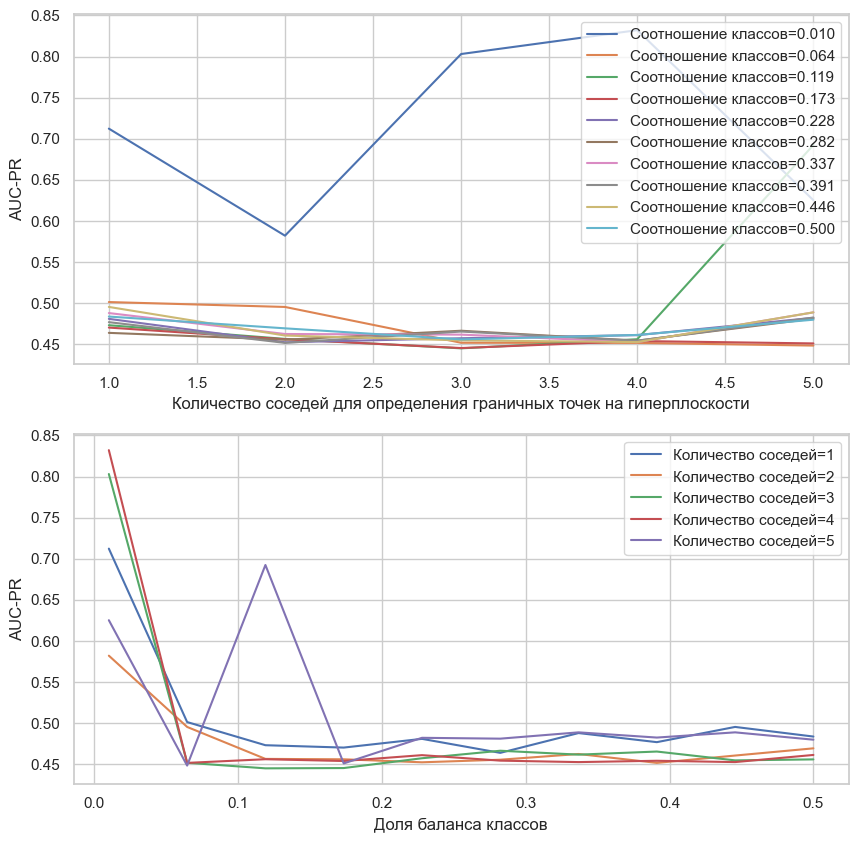

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].set_xlabel('Количество соседей для определения граничных точек на гиперплоскости')
ax[0].set_ylabel('AUC-PR')
for idx, sample in enumerate(sample_list):
    ax[0].plot(k_neighbors, aucs[idx, :], label=f"Соотношение классов={sample:.3f}")
ax[0].legend(loc='upper right')
ax[0].grid(True)

ax[1].set_xlabel('Доля баланса классов')
ax[1].set_ylabel('AUC-PR')
for idx, neighbor in enumerate(k_neighbors):
    ax[1].plot(sample_list, aucs[:, idx], label=f"Количество соседей={neighbor}")
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.show()

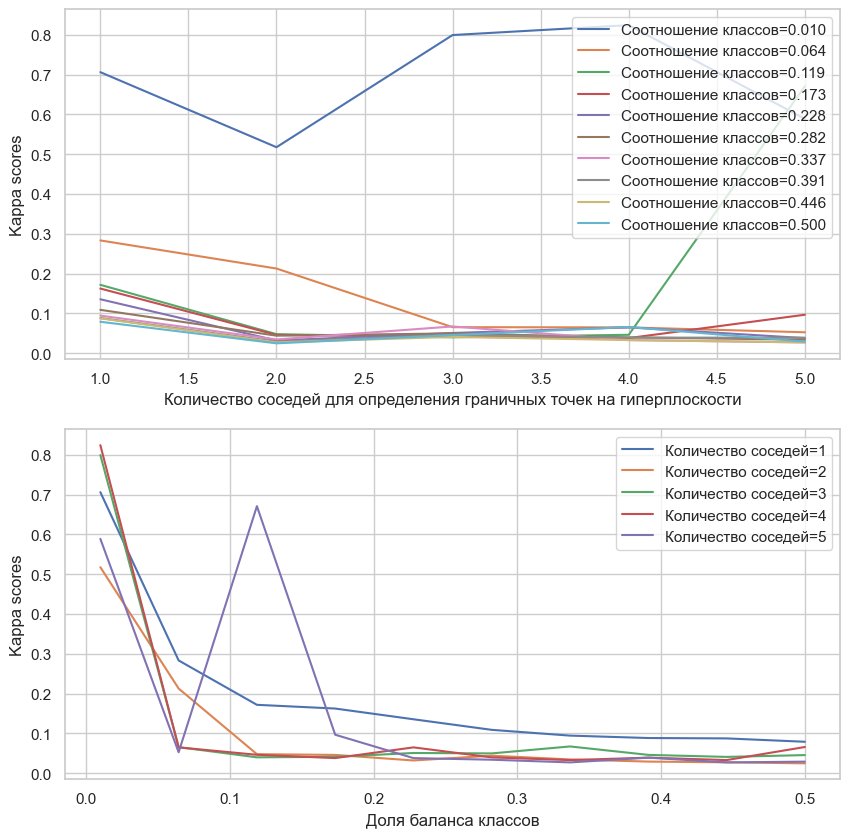

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].set_xlabel('Количество соседей для определения граничных точек на гиперплоскости')
ax[0].set_ylabel('Kappa scores')
for idx, sample in enumerate(sample_list):
    ax[0].plot(k_neighbors, kappas[idx, :], label=f"Соотношение классов={sample:.3f}")
ax[0].legend(loc='upper right')
ax[0].grid(True)

ax[1].set_xlabel('Доля баланса классов')
ax[1].set_ylabel('Kappa scores')
for idx, neighbor in enumerate(k_neighbors):
    ax[1].plot(sample_list, kappas[:, idx], label=f"Количество соседей={neighbor}")
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.show()

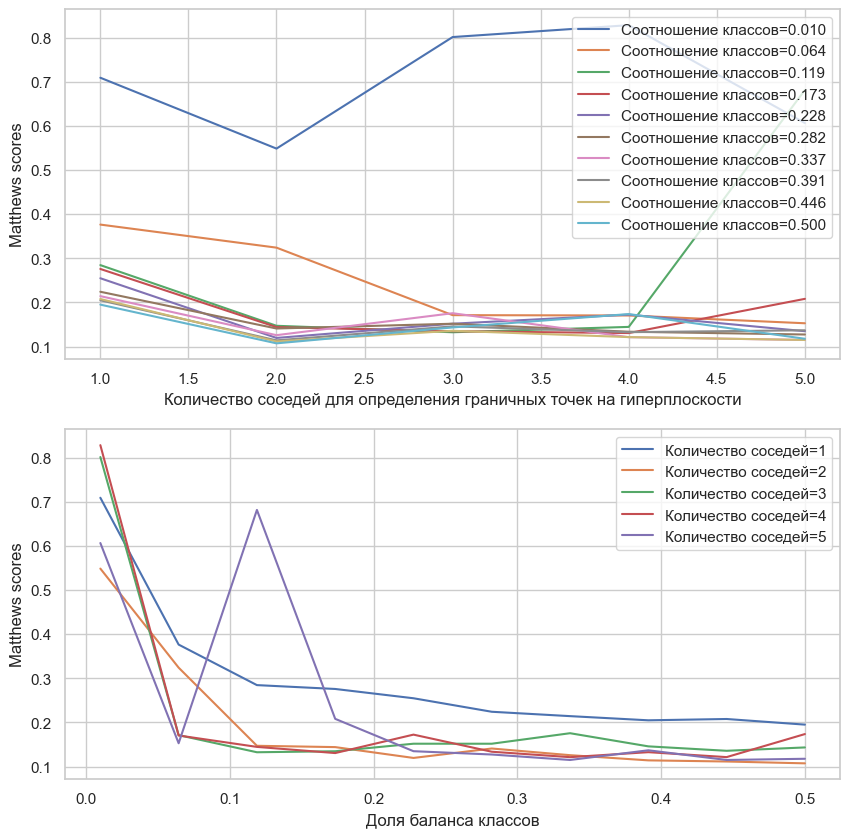

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].set_xlabel('Количество соседей для определения граничных точек на гиперплоскости')
ax[0].set_ylabel('Matthews scores')
for idx, sample in enumerate(sample_list):
    ax[0].plot(k_neighbors, matthews[idx, :], label=f"Соотношение классов={sample:.3f}")
ax[0].legend(loc='upper right')
ax[0].grid(True)

ax[1].set_xlabel('Доля баланса классов')
ax[1].set_ylabel('Matthews scores')
for idx, neighbor in enumerate(k_neighbors):
    ax[1].plot(sample_list, matthews[:, idx], label=f"Количество соседей={neighbor}")
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.show()

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.

**Бонус (2 балла)**. Сможете ли вы с помощью комбинации любых методов оверсэмплинга, андерсэмплинга и классификации набрать 0.8 на всех трех метриках?

***Бонус 1***

Выберу модель OneSidedSelection:

OSS сочетает два подхода: Condensed Nearest Neighbor (CNN) и Edited Nearest Neighbor (ENN). Сначала применяется алгоритм CNN: он удаляет избыточных объектов мажоритарного класса, в результате чего мы получаем выборку, которая содержит в себе все образцы миноритарного класса и подмножество мажоритарного класса. Далее к полученной выборке применяется алгоритм ENN: он удаляет шумные образцы, если его класс не совпадает с мажоритарным классом его соседей. В конечном итоге мы получаем все образцы миноритарного класса и те образцы мажоритарного класса, которые остались после применения CNN и ENN.

In [54]:
from imblearn.under_sampling import OneSidedSelection


ss_model = OneSidedSelection(random_state=42)
X_train_ss, y_train_ss = ss_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(verbose=False)
catboost.fit(X_train_ss, y_train_ss, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
calc_metrics(y_test, y_pred)

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


AUC-PR: 0.7300869685710354
Kappa score: 0.7177586528421791
Matthews score: 0.7237392722838328


Данная модель также улучшает метрики в сравнении базовой моделью, её качество сравнимо с over-sampling моделями, которые мы рассматривали в бонусе.

***Бонус 2***

In [55]:
adasyn_model = ADASYN(random_state=42, sampling_strategy=0.06, n_neighbors=6, n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn_model.fit_resample(X_train, y_train)  

catboost = CatBoostClassifier(random_state=12, verbose=False)
catboost.fit(X_train_adasyn, y_train_adasyn, eval_set=(X_val, y_val))
y_pred = catboost.predict(X_test)
print(f"ADASYN metrics for sample=6 n_neighbors=6:")
calc_metrics(y_test, y_pred)

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


ADASYN metrics for sample=6 n_neighbors=6:
AUC-PR: 0.8343299323106295
Kappa score: 0.8203918699904775
Matthews score: 0.8272276657666917


Получилось выбить 0.8!

# Часть 2. Поиск аномалий. 

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка. 

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных). 

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову). 

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.



**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


*Offtop: в данном задании была использована помощь chatgpt*

In [56]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler

def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    if n <= 1:
        return 0
    return 2.0 * (np.log(n - 1) + 0.5772156649) - (2.0 * (n - 1) / n)

def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node
        depth: int - path length up to current node
        node: Node - current tree node
    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    scores = np.zeros(X.shape[0])

    if node.kind == "external":
        scores.fill(depth + c_factor(node.size))
        return scores
    
    left_indices = np.dot(X, node.w) <= node.b
    right_indices = ~left_indices
    
    scores[left_indices] = calc_height(X[left_indices], depth + 1, node.left)
    scores[right_indices] = calc_height(X[right_indices], depth + 1, node.right)
    
    return scores

class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.
    Attributes:
        X: np.array - data available to current node
        size: int - length of available data
        depth: int - depth of node
        left: Node - left child
        right: Node - right child
        kind: str - either "internal" or "external", indicates the type of current node
        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left=None, right=None, kind="external", w=None, b=None):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.
        Params:
            X: np.array - data available to current node
            depth: int - depth of node
            left: Node - left child
            right: Node - right child
            kind: str - either "internal" or "external", indicates the type of current node
            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane
        """
        self.size = len(X)
        self.depth = depth
        self.left = left
        self.right = right
        self.kind = kind
        self.w = w
        self.b = b
    
    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth
        max_depth: int - maximum tree depth
        root: Node - root node 
        internal_count: int - number of internal nodes
        external_count: int - number of external nodes
    """
    def __init__(self, X, max_depth):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth
        """
        self.depth = 0
        self.max_depth = max_depth
        self.internal_count = 0
        self.external_count = 0
        self.root = self.grow(X, 0)
        
    def __repr__(self):
        """
        For convenience only.
        """
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"
        
    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample
            depth: int - current tree depth
        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        if depth >= self.max_depth or len(X) <= 1:
            self.external_count += 1
            return Node(X, depth)
        
        n_features = X.shape[1]
        w = np.random.randn(n_features)
        b = np.random.uniform(np.min(X @ w), np.max(X @ w))
        
        left_indices = np.dot(X, w) <= b
        right_indices = ~left_indices
        
        if np.all(left_indices) or np.all(right_indices):
            self.external_count += 1
            return Node(X, depth)
        
        left = self.grow(X[left_indices], depth + 1)
        right = self.grow(X[right_indices], depth + 1)
        
        self.internal_count += 1
        return Node(X, depth, left, right, kind="internal", w=w, b=b)

    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated
        Returns:
            scores: np.array - estimated anomaly scores
        """
        return calc_height(X, 0, self.root)

class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees
        max_depth: int - maximum depth of each tree
        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree
        trees: list - container for trained trees 
        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding
    """
    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees
            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree
            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2/subsample_size) if not provided
            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False
        
    def __repr__(self):
        """For convenience only."""
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"
        
    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        # Normalize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        n_samples = X.shape[0]
        subsample_size = min(int(self.subsample_rate * n_samples), n_samples)
        if self.max_depth is None:
            self.max_depth = math.ceil(np.log2(subsample_size))
        
        self.trees = []
        for _ in range(self.n_trees):
            subsample_indices = np.random.choice(n_samples, subsample_size, replace=False)
            tree = RandomizedTree(X[subsample_indices], self.max_depth)
            self.trees.append(tree)
        
        self.is_fit = True
        self.scaler = scaler
        return self
    
    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples
        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        X = self.scaler.transform(X)

        scores = np.zeros(X.shape[0])
        for tree in self.trees:
            scores += tree.score_samples(X)
        scores /= len(self.trees)
        scores = 2 ** (-scores / c_factor(len(X)))
        return scores

    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples
        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        scores = self.score_samples(X)
        threshold = np.percentile(scores, 100 * (1 - self.contamination))
        return (scores > threshold).astype(int)


**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

In [78]:
eif = ExtendedIsolationForest(n_trees=200, subsample_rate=0.3)
eif.fit(X_train)
y_pred_eif = eif.predict(X_test)
calc_metrics(y_test, y_pred_eif)

AUC-PR: 0.26955930838003694
Kappa score: 0.07056278001399574
Matthews score: 0.13712524619368346


In [58]:
pd.Series(y_pred_eif).value_counts()

0    28196
1      285
dtype: int64

In [59]:
score_samples_eif = eif.score_samples(X_test)
score_samples_eif

array([0.2856005 , 0.32378661, 0.28135755, ..., 0.29492652, 0.29637593,
       0.2844283 ])

In [60]:
pd.Series(score_samples_eif).value_counts()

0.309086    36
0.292788    11
0.308768     9
0.293511     8
0.292650     7
            ..
0.293706     1
0.288120     1
0.286916     1
0.349598     1
0.284428     1
Length: 27900, dtype: int64

In [ ]:
trees = [100, 150, 200, 250]
sub_rates = np.linspace(0.1, 0.9, 9)
for tree in trees:
    for rate in sub_rates:
        eif = ExtendedIsolationForest(n_trees=tree, subsample_rate=rate)
        eif.fit(X_train)
        y_pred = eif.predict(X_test)
        print(pd.Series(y_pred).value_counts())
        calc_metrics(y_test, y_pred)
        print("\n")

0    28196
1      285
dtype: int64
AUC-PR: 0.24502725368214645
Kappa score: 0.063803905269045
Matthews score: 0.12417959298781006


0    28196
1      285
dtype: int64
AUC-PR: 0.24502725368214645
Kappa score: 0.063803905269045
Matthews score: 0.12417959298781006


0    28196
1      285
dtype: int64
AUC-PR: 0.24502725368214645
Kappa score: 0.063803905269045
Matthews score: 0.12417959298781006


0    28196
1      285
dtype: int64
AUC-PR: 0.2205631505533195
Kappa score: 0.05727989067161676
Matthews score: 0.11148210254519564


0    28196
1      285
dtype: int64
AUC-PR: 0.24502725368214645
Kappa score: 0.063803905269045
Matthews score: 0.12417959298781006


0    28196
1      285
dtype: int64
AUC-PR: 0.26949135681097336
Kappa score: 0.07032791986647324
Matthews score: 0.13687708343042446


0    28196
1      285
dtype: int64
AUC-PR: 0.26949135681097336
Kappa score: 0.07032791986647324
Matthews score: 0.13687708343042446


0    28196
1      285
dtype: int64
AUC-PR: 0.26949135681097336
Kappa sc

Гиперпараметры очень долго подбирались, но в итоге при подстановке их в модель, метрики выдают одно и то же качество, поэтому я оставила самую первую обученную модель. Качество у такой модели мягко говоря не очень в сравнении с алгоритмами из 1 части дз.

Обучим IF модель из sklearn:

In [61]:
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(random_state=42, n_estimators=200)
if_model.fit(X_train,y_train)
y_pred_if = if_model.predict(X_test)
calc_metrics(y_test, y_pred_if)

AUC-PR: 0.11402625601504496
Kappa score: -0.0005663092733636521
Matthews score: -0.05189008442520681


In [62]:
pd.Series(y_pred_if).value_counts()

 1    27338
-1     1143
dtype: int64

Видим, что алгоритм IsolationForest выдал нам негативный класс, заменим его на 0 и ещё раз посчитаем метрики.

In [63]:
pd.Series(np.where(y_pred_if == -1, 1, 0)).value_counts()

0    27338
1     1143
dtype: int64

In [64]:
score_samples_if = if_model.score_samples(X_test)
score_samples_if

array([-0.38545106, -0.49197702, -0.3811578 , ..., -0.41843759,
       -0.45431738, -0.40560314])

In [65]:
pd.Series(score_samples_if).value_counts()

-0.518629    18
-0.516619    18
-0.414520    10
-0.412822     9
-0.423784     9
             ..
-0.403510     1
-0.402731     1
-0.410968     1
-0.391404     1
-0.405603     1
Length: 27776, dtype: int64

In [66]:
calc_metrics(y_test, np.where(y_pred_if == -1, 1, 0))

AUC-PR: 0.3938879846091229
Kappa score: 0.027710835409266887
Matthews score: 0.10378016885041362


С заменой класса качество модели `IsolationForest` улучшилось, но все равно не так, как бы хотелось. Можно сказать, что пока что такой подход в целом не очень хорошо работает на наших данных.


Если сравнить `IsolationForest` из `sklearn` и реализованный `ExtendedIsolationForest`, то наш метод выигрывает по двум метрикам: `matthews score` и `kappa score`, но зато `AUC-PR` заметно уступает библиотечному методу. Однако, я бы лучше использовала обычный `IsolationForest`, так как он имеет более сильный перевес в `AUC-PR`.

Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

Мой алгоритм отриацтельных оценок не выдал, выдал обычный `IsolationForest`, можем проделать это задание на его предсказаниях.

Ещё раз выведем score_samples для `IsolationForest` и `ExtendedIsolationForest`:

In [67]:
#IsolationForest
print("IsolationForest\n", pd.Series(score_samples_if).value_counts())
print("\nExtendedIsolationForest")

#ExtendedIsolationForest
print(pd.Series(score_samples_eif).value_counts())

IsolationForest
 -0.518629    18
-0.516619    18
-0.414520    10
-0.412822     9
-0.423784     9
             ..
-0.403510     1
-0.402731     1
-0.410968     1
-0.391404     1
-0.405603     1
Length: 27776, dtype: int64

ExtendedIsolationForest
0.309086    36
0.292788    11
0.308768     9
0.293511     8
0.292650     7
            ..
0.293706     1
0.288120     1
0.286916     1
0.349598     1
0.284428     1
Length: 27900, dtype: int64


In [68]:
X_test_new = X_test.copy()
X_test_new["if"] = score_samples_if

Выведем графики зависимости предсказанного таргета от значимых признаков, которые мы вывели в начале ноутбука:

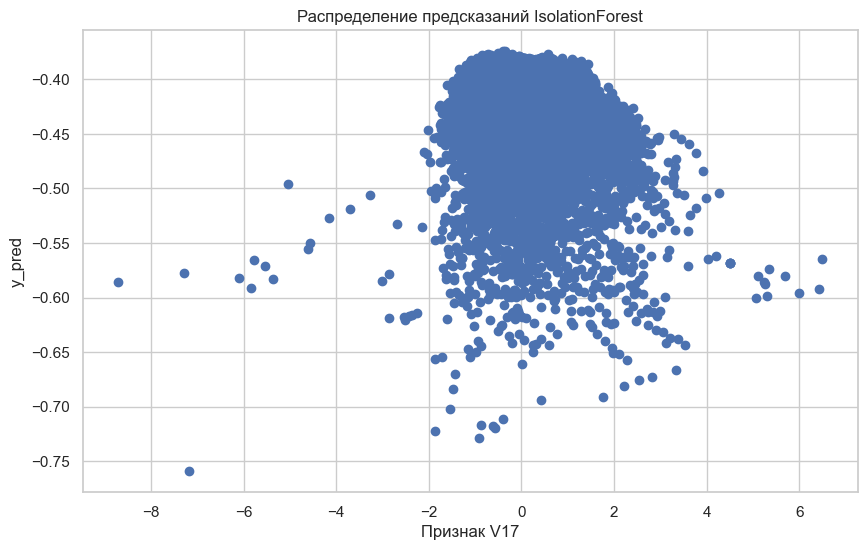

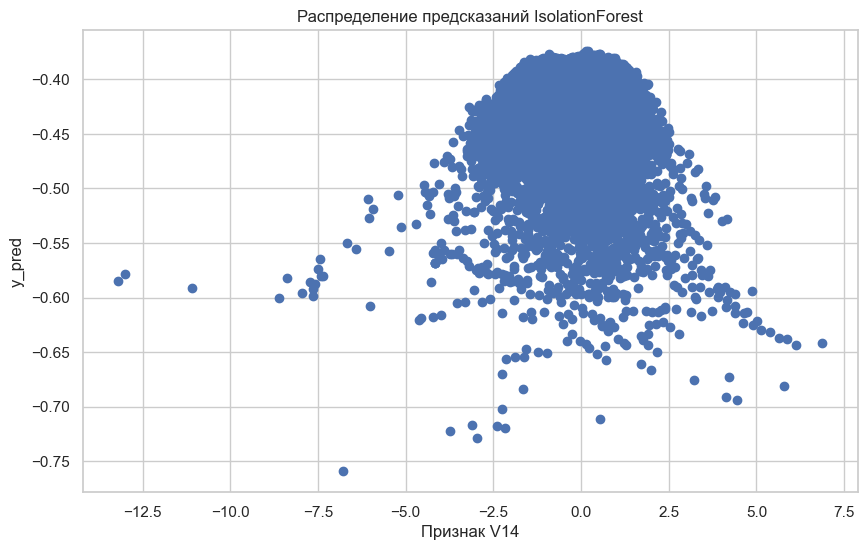

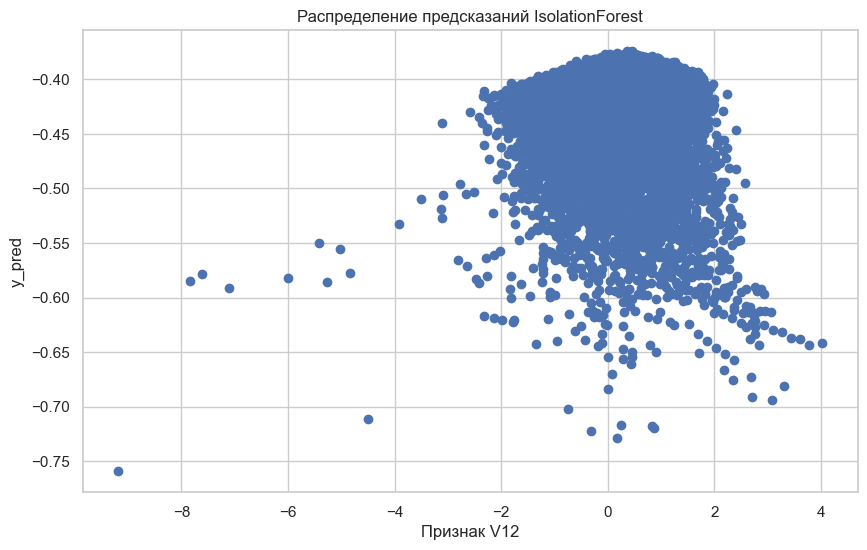

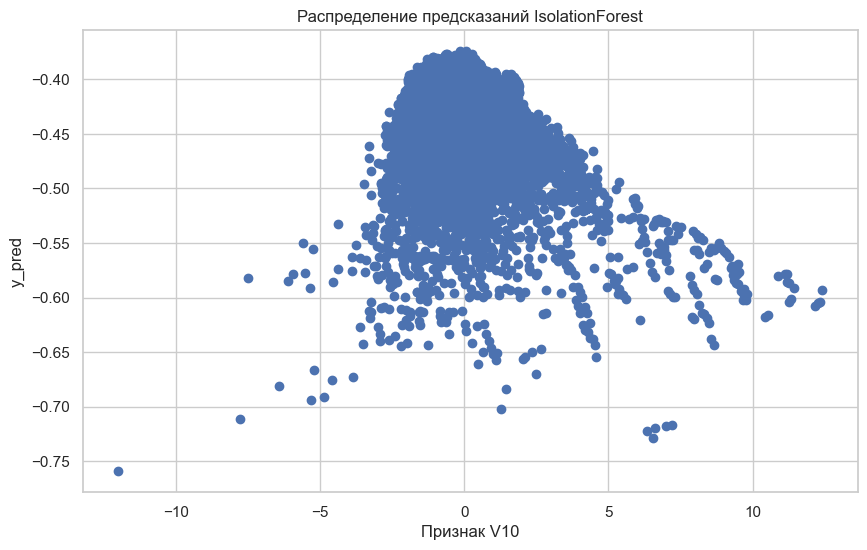

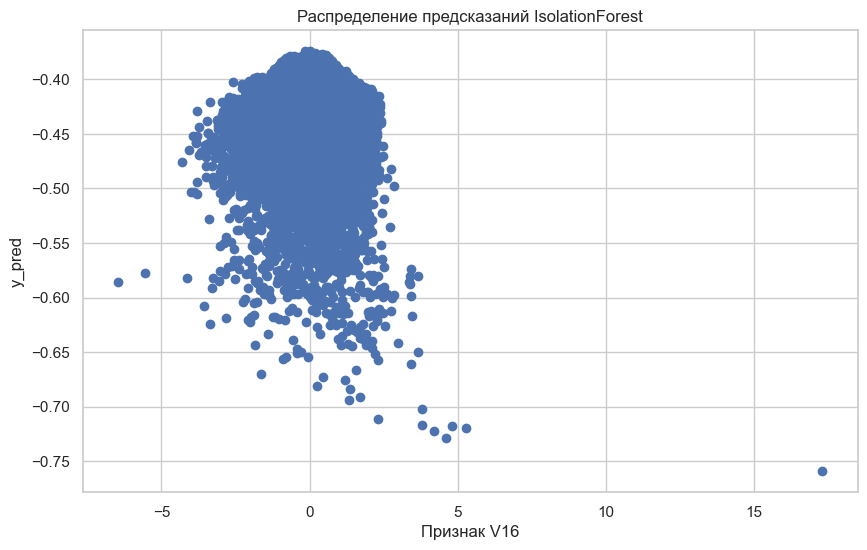

In [70]:
for feature in top_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[f"{feature}"], X_test_new["if"])
    plt.title(f'Распределение предсказаний IsolationForest')
    plt.xlabel(f"Признак {feature}")
    plt.ylabel("y_pred")
    plt.show()

Можно заметить, что у большего числа объектов значения признаков расположение близь нуля. Также можно заметить закономерность: чем меньше значение y_pred, тем больше разброс объекта значения признака от нуля.

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [71]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

Обучим LocalOutlierFactor:

In [72]:
loc_out_f = LocalOutlierFactor(novelty=True)
loc_out_f.fit(X_train)
y_pred_loc = loc_out_f.predict(X_test)
calc_metrics(y_test, y_pred_loc)

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


AUC-PR: 0.5003862223938766
Kappa score: 0.0
Matthews score: 0.0


In [73]:
one_svm = OneClassSVM()
one_svm.fit(X_train, y_train)
y_pred_one_svm = one_svm.predict(X_test)
calc_metrics(y_test, y_pred_one_svm)

AUC-PR: 0.5003862223938766
Kappa score: 0.0
Matthews score: 0.0


Что-то как бы да.... Метрики решили вообще стать близкими к рандомному генерированию ответов, что совсем грустно(

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [74]:
X_train_new = X_train.copy()
X_train_new["if"] = if_model.score_samples(X_train)
X_train_new["loc_out_f"] = loc_out_f.score_samples(X_train)
X_train_new["one_svm"] = one_svm.score_samples(X_train)

X_train_new.head()

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hours,days,if,loc_out_f,one_svm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0,-0.407305,-1.455542,54967.129205
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0,-0.395548,-1.352902,54967.090310
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0.0,-0.477387,-1.887804,54967.151151
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.0,-0.436024,-1.525463,54967.728196
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.0,-0.413248,-1.764864,54968.313132


In [75]:
X_val_new = X_val.copy()
X_val_new["if"] = if_model.score_samples(X_val)
X_val_new["loc_out_f"] = loc_out_f.score_samples(X_val)
X_val_new["one_svm"] = one_svm.score_samples(X_val)

X_val_new.head()

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hours,days,if,loc_out_f,one_svm
227846,145249.0,2.152696,-0.036161,-2.231811,0.091766,0.537612,-1.368103,0.613327,-0.455252,0.291814,0.253161,-1.501882,-0.870608,-1.441738,0.988757,0.496349,-0.068699,-0.454073,-0.299095,0.267443,-0.275778,0.017153,0.063242,-0.034561,-0.626866,0.249213,0.773931,-0.137115,-0.090611,14.95,16.0,1.0,-0.405632,-1.311323,66273.292216
227847,145249.0,-4.034795,2.305079,-1.461693,-0.729887,-1.528750,-1.225679,-0.893354,1.622522,1.291998,-0.040956,-0.971425,0.574744,0.155656,-0.729055,0.477439,1.061719,0.934695,0.403769,-0.494930,-0.081093,-0.392557,-0.787599,0.343468,-0.090331,0.248287,-0.238524,0.266484,-0.062236,7.70,16.0,1.0,-0.430562,-1.263514,66273.280618
227848,145249.0,-1.668741,1.168055,0.249642,-1.268497,0.785923,-0.663959,0.859433,0.068111,-0.144183,0.043288,0.542014,1.002025,0.400760,0.136412,-1.289649,0.276828,-0.868492,-0.366840,-0.187392,-0.033523,-0.247544,-0.592537,-0.286694,-0.378856,-0.077429,0.067608,-0.278962,-0.064193,6.99,16.0,1.0,-0.394246,-1.231054,66273.279689
227849,145250.0,-0.550678,-0.429004,-1.291893,-0.414409,-0.292229,0.071843,2.426068,-0.212730,0.412374,-1.939969,-1.810118,-1.223510,-1.324915,-1.462392,-0.311641,0.506708,0.739933,0.892422,0.195043,0.791127,0.003032,-0.645783,0.877016,-1.228529,-0.036281,-0.110610,-0.098380,0.095985,460.71,16.0,1.0,-0.448824,-1.311925,66271.745280
227850,145250.0,1.846910,0.143301,-1.171846,1.570946,0.076854,-0.858130,0.164378,-0.251494,0.442113,-0.356824,-0.353770,0.697210,0.980924,-1.250634,0.228086,0.317509,0.423960,0.148563,-0.702681,-0.046485,-0.018428,0.048949,0.105389,-0.119156,-0.014024,-0.705045,0.044595,0.000922,68.00,16.0,1.0,-0.383851,-1.493575,66272.858211


In [76]:
X_test_new["loc_out_f"] = loc_out_f.score_samples(X_test)
X_test_new["one_svm"] = one_svm.score_samples(X_test)

X_test_new.head()

/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hours,days,if,loc_out_f,one_svm
256326,157641.0,1.985106,0.398793,-2.451505,1.462487,1.035466,-0.846500,0.679494,-0.305204,0.198212,-0.363112,-0.798523,-0.274237,-0.662817,-0.917639,-0.260083,-0.145070,0.953649,0.156307,-0.361630,-0.184153,-0.038611,0.008407,-0.037846,0.383466,0.482723,-0.511534,-0.009908,-0.019809,38.17,19.0,1.0,-0.385451,-737.687375,59668.308749
256327,157641.0,-0.374887,-4.117293,-4.187522,1.183738,-0.310090,-0.899450,2.725253,-0.949894,-0.171054,-0.383950,-1.432924,-0.233955,-0.173061,1.155799,0.060992,-0.437635,-0.227381,-0.285719,-0.113895,2.467233,1.015104,0.086303,-1.426768,-0.596596,0.204410,0.927533,-0.398025,0.125555,1336.00,19.0,1.0,-0.491977,-335.302706,59656.398186
256328,157642.0,-0.041673,0.712444,0.335351,-0.670760,0.428873,-0.811848,0.810955,0.007803,-0.190866,-0.223122,0.766145,0.468258,-0.861865,0.474580,-0.976568,0.054839,-0.527432,-0.274296,0.107782,-0.077453,-0.203472,-0.485264,0.089008,-0.010075,-0.570358,0.123357,0.240496,0.086646,1.98,19.0,1.0,-0.381158,-737.750630,59667.690020
256329,157643.0,-0.832503,0.682724,1.022189,-0.717397,0.427839,1.585504,-0.335735,1.113388,0.019252,-1.051411,0.457362,0.342512,-1.108039,0.693400,0.766083,-0.356980,0.172194,-0.434131,-0.166895,-0.309253,0.000010,-0.032568,-0.033124,-1.699208,-0.504059,-0.412187,0.073561,0.052377,3.99,19.0,1.0,-0.408665,-737.809765,59667.120490
256330,157643.0,2.254208,-1.244813,-1.728640,-1.685269,-0.633272,-1.074740,-0.382061,-0.511530,-1.843693,1.613149,-1.208511,-0.580660,1.463251,-0.196420,0.042886,-0.486150,0.160599,-0.303180,0.137190,-0.223003,-0.303673,-0.567556,0.138124,-0.671258,-0.080240,-0.282735,-0.030580,-0.049971,85.00,19.0,1.0,-0.413169,-658.607332,59667.192938


Возьмем лучшую модель и обучим на новой выборке:

In [80]:
adasyn_model = ADASYN(random_state=42, sampling_strategy=0.06, n_neighbors=6, n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn_model.fit_resample(X_train_new, y_train)  

catboost = CatBoostClassifier(random_state=12, verbose=False)
catboost.fit(X_train_adasyn, y_train_adasyn, eval_set=(X_val_new, y_val))
y_pred_best = catboost.predict(X_test_new)
print(f"ADASYN model on new data with generated features:")
calc_metrics(y_test, y_pred_best)


/Users/ruagyk6/Library/Python/3.9/lib/python/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


ADASYN model on new data with generated features:
AUC-PR: 0.7115677839730336
Kappa score: 0.7108828212298137
Matthews score: 0.7110586906187203


К сожалению, обучение на новой выборке не привело ни к чему хорошему: качество на всех метриках упало на 0.1 (

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла. 

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `your text here`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [79]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)

-0.3506913414038304